<a href="https://colab.research.google.com/github/abbazs333/ML_dev_training/blob/main/pizza_or_not_pizza_%3F_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pizza or not pizza?

In this notebook i will be trying to build a binary classification model that detects whether a given image is a pizza or not

##Problem

Identify whether a given image is a pizza or not

##Data

The data we are using is from a kaggle dataset (https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza)

##Evaluation 

We will be measuring the acuracy of the model 



In [1]:
# unzip the zip folder containg the needed data
# !unzip "/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/archive.zip" -d "/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/"

##Importing necessary tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import display, Image

##Importing and getting the data ready

In [3]:
import os
pizza_filenames = os.listdir("/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/pizza_not_pizza/pizza/")
not_pizza_filenames = os.listdir("/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/pizza_not_pizza/not_pizza/")


In [4]:
pizza_filepaths = []
for val in pizza_filenames:
  pizza_filepaths.append("/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/pizza_not_pizza/pizza/" + val)
not_pizza_filepaths = []
for val in not_pizza_filenames:
  not_pizza_filepaths.append("/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/pizza_not_pizza/not_pizza/" + val)


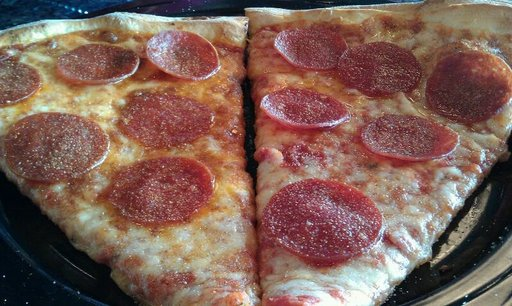

In [5]:
#Just for fun lest look at a random image 
Image(pizza_filepaths[47])

Lets put all of the filepaths in a dataframe together with a boolean that says whether it's a pizza or not 

In [6]:
pizza_labels = []
for val in range(len(os.listdir("/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/pizza_not_pizza/pizza/"))):
  pizza_labels.append(True)

not_pizza_labels = []
for val in range(len(os.listdir("/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/pizza_not_pizza/not_pizza/"))):
  not_pizza_labels.append(False)

In [7]:
filepaths = pizza_filepaths + not_pizza_filepaths
labels = pizza_labels + not_pizza_labels

In [8]:
labels[1500]

False

###Now let's turn our images into tensors

To preprocess our images, we will write a function that does a few things:
* Take our images as filenames
* Use tensorflow to read the image and stores it in a variable
* Turn our images into tensors
* Resize the image to be of shape (224,224)
* Return the modified image

In [9]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(not_pizza_filepaths[42]) # read in an image
image.shape

(512, 512, 3)

So as you see above, i have converted the above image into a numpy array and checked its shape. to convert this into a tensor, we can use `tf.constant()`

In [10]:
tf.constant(image)[:10]

<tf.Tensor: shape=(10, 512, 3), dtype=uint8, numpy=
array([[[ 54,  15,  10],
        [ 55,  16,  11],
        [ 56,  17,  12],
        ...,
        [ 53,  47,  75],
        [ 41,  35,  63],
        [ 39,  33,  61]],

       [[ 54,  15,  10],
        [ 55,  16,  11],
        [ 57,  16,  12],
        ...,
        [ 65,  59,  87],
        [ 47,  41,  69],
        [ 39,  33,  61]],

       [[ 55,  16,  11],
        [ 57,  16,  12],
        [ 58,  17,  13],
        ...,
        [ 76,  70,  98],
        [ 64,  58,  86],
        [ 58,  52,  80]],

       ...,

       [[ 58,  14,  11],
        [ 59,  15,  12],
        [ 61,  16,  13],
        ...,
        [159, 155, 178],
        [146, 142, 165],
        [138, 135, 156]],

       [[ 59,  15,  12],
        [ 59,  15,  12],
        [ 60,  15,  12],
        ...,
        [151, 148, 169],
        [157, 154, 175],
        [154, 151, 172]],

       [[ 59,  15,  12],
        [ 59,  15,  12],
        [ 60,  15,  12],
        ...,
        [146, 141, 163

In [11]:
#Let's define the image size
IMG_SIZE = 224

def process_image(image_path):
  #So this command basically reads the file into some weird format that i have no clue
  image = tf.io.read_file(image_path)
  #This command turns the image into a tensor with 3 colour channels 
  image = tf.image.decode_jpeg(image, channels = 3)
  #SO in the previos statement, we assigned RGB colour values. since it's from range 0-255, let's convert it within the range 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired size
  image = tf.image.resize(image, size = [IMG_SIZE,IMG_SIZE])
  #Return the image
  return image


In [12]:
#Let's try the our new function on a sample image
x = process_image(pizza_filepaths[88])
x[:5]

<tf.Tensor: shape=(5, 224, 3), dtype=float32, numpy=
array([[[0.38519037, 0.5420531 , 0.54989624],
        [0.38457885, 0.5414416 , 0.54928476],
        [0.4039491 , 0.5608118 , 0.56865495],
        ...,
        [0.45228043, 0.732396  , 0.8029589 ],
        [0.50916886, 0.7637218 , 0.81473595],
        [0.55001175, 0.78375894, 0.82122993]],

       [[0.3938538 , 0.5507166 , 0.5470751 ],
        [0.3944428 , 0.55130553, 0.54966366],
        [0.40076908, 0.55763185, 0.5581445 ],
        ...,
        [0.26591787, 0.53135234, 0.5667162 ],
        [0.31751364, 0.5387507 , 0.54914975],
        [0.39303175, 0.5815106 , 0.5636568 ]],

       [[0.3825143 , 0.5432986 , 0.5262393 ],
        [0.40054026, 0.5591712 , 0.549945  ],
        [0.40397912, 0.56084186, 0.5605092 ],
        ...,
        [0.47639075, 0.6687397 , 0.65397716],
        [0.47676316, 0.6313599 , 0.5765165 ],
        [0.4843905 , 0.6139946 , 0.5125759 ]],

       [[0.36896008, 0.5258228 , 0.5160189 ],
        [0.33463758, 0.48934

Great! our function works!

Now we'll have to convert our images to a batch.

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of `process_image` function at the same time.

We'll also create another small function that returns the boolean value of an image (whether it's a pizza or not) along with its tensor

In [13]:
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image, label

In [14]:
#Let's first define the batch size
BATCH_SIZE = 32

#x will be the file paths where as y will be the boolean value associated with the image
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating train data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data = data.shuffle(buffer_size=len(x))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

Now let's create a train and test dataset


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(filepaths,labels, test_size = 0.2)

In [16]:
train_data = create_data_batches(x_train,y_train)
test_data = create_data_batches(x_train, test_data = True)

Creating train data batches...
Creating test data batches...


Awesome! we have our data in batches
##Creating and training a model

For this project, we will be using a pretrained model (https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5)

###Building a model

Before we build a model, we need to define some things:
* The input shape of our data (which is in tensors)
* The output shape of our labels (which is in tensors)
* The URL of the model we are oging to use


In [17]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = 1 # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

ALright, now it's time to define our model. We will use a function to do this. The function will do the following:
* Takes the inpute shape, output shape and model URL as parameters
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved)
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model



In [18]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="sigmoid") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [19]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 1)                 1002      
                                                                 
Total params: 5,433,715
Trainable params: 1,002
Non-trainable params: 5,432,713
_________________________________________________________________


###Creating callbacks

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

####Tensorboard callback

TensorBoard helps provide a visual way to monitor the progress of your model during and after training.

It can be used directly in a notebook to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

* Load the TensorBoard notebook extension.
* Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
* Visualize the our models training logs using the `%tensorboard` magic function (we'll do this later on).

In [20]:
#Load the tensorboard notebook extension 
%load_ext tensorboard

In [21]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

####Early stopping callback

Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [22]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [23]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100

Now let's write a function that trains a model. the function will:
* Create a mode using `create_mode()`
* Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
* Call the `fit()` function and fit the train data
* Return the fitted model

In [24]:
#Build a function to train and return a model
def train_model():
  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            callbacks=[tensorboard, early_stopping])
  
  return model

In [25]:
# Fit the model to the data
#model = train_model()

In [26]:
import pickle
# filename_1 = '/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/finalized_model.sav'
# pickle.dump(model, open(filename_1, 'wb'))

import joblib
# filename_2 = '/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/finalized_model.sav'
# joblib.dump(model, filename_2)

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/pizza_or_not_pizza_?/finalized_model.sav', 'rb'))